In [1]:
from sqlalchemy import create_engine, text, inspect, func
import sqlite3

# ORM imports
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy import Column, Integer, String, Float, Boolean
from sqlalchemy.orm import Session
from sqlalchemy.ext.declarative import declarative_base

# API
import requests
import json

# Data Science and Visualization
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import datetime as dt

## Automapping the Bases

In [2]:
# Create engine using the `f1.sqlite` database file
engine = create_engine("sqlite:///f1.sqlite")

In [3]:
# Create a base using `automap_base()` for reflection
Base = automap_base()

# Use the Base class to reflect the tables in the Hawaii Database
Base.prepare(autoload_with=engine)

# Print all of the classes mapped to the Base
Base.classes.keys()

['constructors', 'races', 'results', 'drivers', 'circuits']

In [4]:
# Save references to the classes
Circuits = Base.classes.circuits
Constructors = Base.classes.constructors
Drivers = Base.classes.drivers
Results = Base.classes.results
Races = Base.classes.races



In [5]:
# Create a session
session = Session(engine)

## Charts

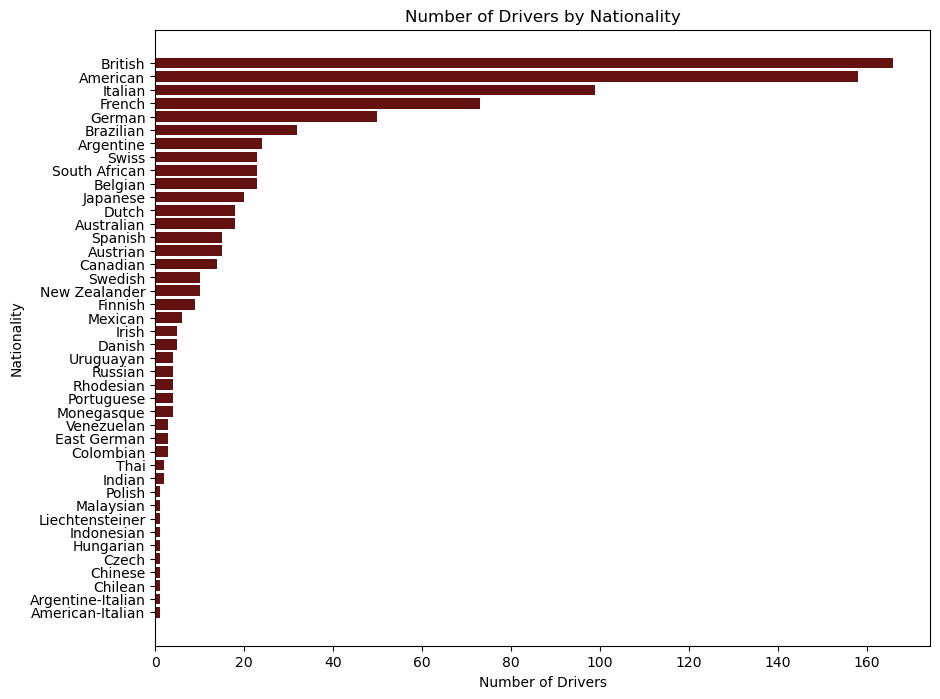

In [6]:
## Horizontal Bar Chart showing the nationalities of the drivers

driver_nationalities = session.query(Drivers.nationality, func.count(Drivers.nationality)).group_by(Drivers.nationality).order_by(func.count(Drivers.nationality).asc()).all()

nationalities = [data[0] for data in driver_nationalities]
driver_counts = [data[1] for data in driver_nationalities]

plt.figure(figsize=(10, 8))
plt.barh(nationalities, driver_counts, color='#641211')
plt.xlabel('Number of Drivers')
plt.ylabel('Nationality')
plt.title('Number of Drivers by Nationality')
plt.show()

In [7]:
## Possible areas of additional cleaning:

## East Germany into Germany
## Rhodesian become Zimbabwe
## Argentine-Italian and American-Italian in their respective countries

In [8]:
nationality = 'Argentine'

driver_query = session.query(Drivers.forename, Drivers.surname, func.count(Results.position)).\
filter(Drivers.driverId == Results.driverId).\
filter(Results.position==1).filter(Drivers.nationality == f"{nationality}").\
group_by(Drivers.forename, Drivers.surname).order_by(func.count(Results.position).asc()).all()

display(driver_query)

df = pd.DataFrame(driver_query, columns=["forename", "surname", "wins"])

[('José Froilán', 'González', 2),
 ('Carlos', 'Reutemann', 12),
 ('Juan', 'Fangio', 24)]

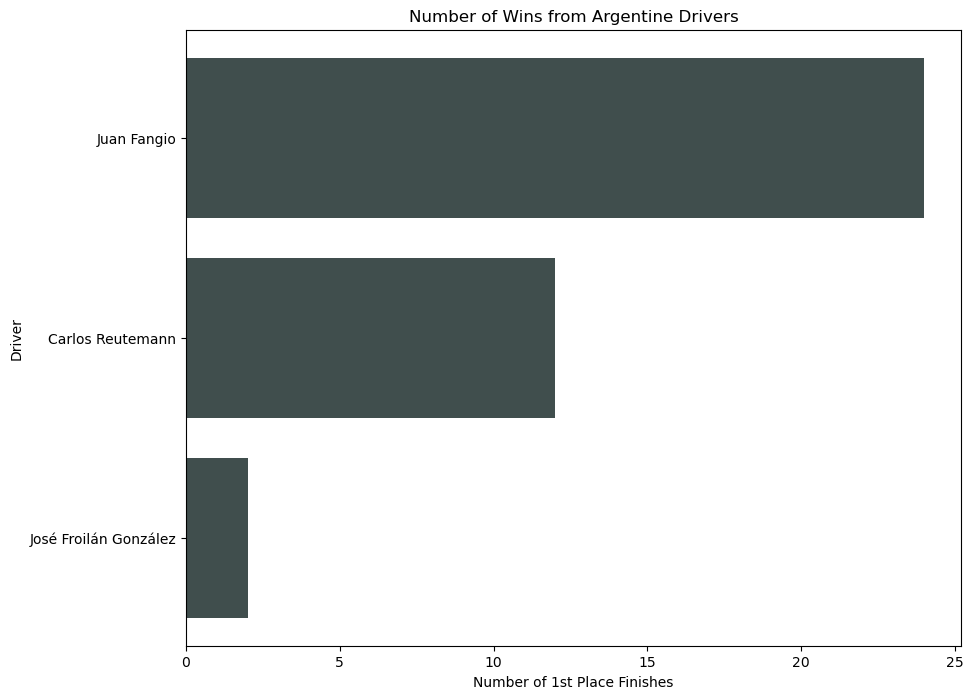

In [9]:
name = [data[0] + " " + data[1] for data in driver_query]
num_of_1st = [data[2] for data in driver_query]

# Create a horizontal bar chart using Matplotlib
plt.figure(figsize=(10, 8))
plt.barh(name, num_of_1st, color='#404E4D')
plt.xlabel('Number of 1st Place Finishes')
plt.ylabel('Driver')
plt.title(f'Number of Wins from {nationality} Drivers')
plt.show()

In [10]:
nationality = 'Argentine'

driver_query = session.query(Drivers.forename, Drivers.surname, func.count(Results.position)).\
    filter(Drivers.driverId == Results.driverId).\
    filter(Results.position==1).filter(Drivers.nationality == f"{nationality}").\
    group_by(Drivers.forename, Drivers.surname).order_by(func.count(Results.position).asc()).all()

display(driver_query)

df = pd.DataFrame(driver_query, columns=["forename", "surname", "wins"])

[('José Froilán', 'González', 2),
 ('Carlos', 'Reutemann', 12),
 ('Juan', 'Fangio', 24)]

In [11]:
map_query = session.query(Circuits.name, Circuits.location, Circuits.country, Circuits.lat, Circuits.lng).all()

df3 = pd.DataFrame(map_query, columns=["Circuit Name", "City", "Country", "Latitude", "Longitude"])

df3

,Circuit Name,City,Country,Latitude,Longitude
0,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.84970,144.96800
1,Sepang International Circuit,Kuala Lumpur,Malaysia,2.76083,101.73800
2,Bahrain International Circuit,Sakhir,Bahrain,26.03250,50.51060
3,Circuit de Barcelona-Catalunya,Montmeló,Spain,41.57000,2.26111
4,Istanbul Park,Istanbul,Turkey,40.95170,29.40500
...,...,...,...,...,...
72,Autodromo Internazionale del Mugello,Mugello,Italy,43.99750,11.37190
73,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.63190,39.10440
74,Losail International Circuit,Al Daayen,Qatar,25.49000,51.45420
75,Miami International Autodrome,Miami,USA,25.95810,-80.23890


In [12]:
dropdown_query = session.query(Drivers.nationality.distinct()).order_by(Drivers.nationality.asc()).all()

df4 = pd.DataFrame(dropdown_query, columns=["Nationality"])
df4

,Nationality
0,American
1,American-Italian
2,Argentine
3,Argentine-Italian
4,Australian
5,Austrian
6,Belgian
7,Brazilian
8,British
9,Canadian


In [13]:
#bubble chart
# drivers
# number of races x
# average finishing position y

nationality = 'American'

bubble_query = session.query(Drivers.forename, Drivers.surname, func.count(Results.position), func.avg(Results.position), Drivers.nationality).\
    filter(Drivers.driverId == Results.driverId).\
    filter(Drivers.nationality == f"{nationality}").\
    group_by(Drivers.forename, Drivers.surname).\
    order_by(func.count(Results.position).desc()).all()


df5 = pd.DataFrame(bubble_query, columns=["forename", "surname", "Number of Races", "Average Finish", "Nationality"])
df5

,forename,surname,Number of Races,Average Finish,Nationality
0,Mario,Andretti,62,5.709677,American
1,Eddie,Cheever,55,7.545455,American
2,Dan,Gurney,44,5.295455,American
3,Richie,Ginther,39,5.282051,American
4,Phil,Hill,33,5.151515,American
...,...,...,...,...,...
127,Travis,Webb,1,20.000000,American
128,Walt,Ader,1,22.000000,American
129,Walt,Brown,1,19.000000,American
130,Walt,Hansgen,1,5.000000,American


In [ ]:
race_query = session.query(Races.name, Circuits.name, Circuits.country, Races.year, Races.date, Races.round, Constructors.name, Drivers.forename, Drivers.surname, Results.position, Results.rank).\
    filter(Constructors.constructorId == Results.constructorId).\
    filter(Drivers.driverId == Results.driverId).\
    filter(Circuits.circuitId == Races.circuitId).\
    filter(Races.raceId == Results.raceId).\
    order_by(Races.year.desc()).\
    order_by(Races.date.asc()).\
    order_by(Results.points.desc()).all()

#save query to dataframe
df6 = pd.DataFrame(race_query, columns=["race", "circuit", "country", "year", "date", "round", "constructor", "driver_first", "driver_last", "position", "rank"])
df6

: 

In [9]:
# Close session and end engine
session.close()
engine.dispose()